Kardiovaskular: hear attack & hypertension

By: Aurelia Sukianto

# 1. Data Collecting and Import Library

In [1]:
# connect to my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# create shortcut do datasets folder
!ln -s "/content/drive/MyDrive/omnifit/dataset" "/content/dataset"

In [3]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.2 MB/s eta 0:00:00


In [4]:
import pandas as pd
import seaborn as sns
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
from transformers import TFBertForSequenceClassification
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
# Baca dataset dari file CSV
file_path = '/content/dataset/dataset_v1.0.xlsx'

df = pd.read_excel(file_path)

# 2. Data Understanding

In [6]:
df = df[['Keluhan','Kardiovaskuler']]
df.head(10)

,Keluhan,Kardiovaskuler
0,"Saya sering merasakan nyeri dada yang tajam, t...",1
1,"Belakangan ini, saya mengalami detak jantung y...",1
2,Saya mengalami pembengkakan pada kaki dan perg...,1
3,"Beberapa bulan terakhir, saya merasakan tekana...",1
4,Saya sering merasakan kelelahan yang tidak waj...,1
5,"Sejak beberapa minggu yang lalu, saya merasaka...",1
6,"Saya mengalami nyeri dada yang terus-menerus, ...",1
7,Saya merasakan denyut jantung yang sangat kuat...,1
8,"Beberapa bulan terakhir, saya sering merasakan...",1
9,"Setiap kali saya naik tangga, saya merasa sang...",1


In [7]:
len(df)

47

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Keluhan         47 non-null     object
 1   Kardiovaskuler  47 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 880.0+ bytes


<Axes: xlabel='Kardiovaskuler', ylabel='count'>

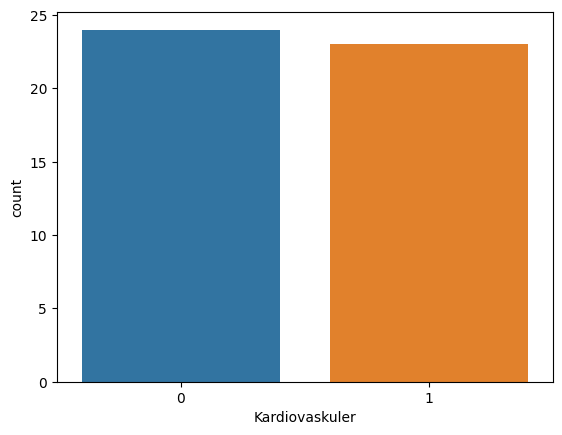

In [9]:
sns.countplot(x ='Kardiovaskuler', data = df)

# 3. Data Preparation

In [10]:
# Mengacak urutan baris
shuffled_data = df.sample(frac=1, random_state=50)

shuffled_data.head(47)

,Keluhan,Kardiovaskuler
34,Saya mengalami gangguan tidur dan insomnia bel...,0
1,"Belakangan ini, saya mengalami detak jantung y...",1
44,Saya mengalami ketidaknyamanan di dada yang mu...,0
40,"Saya sering merasakan kecemasan dan stres, yan...",0
8,"Beberapa bulan terakhir, saya sering merasakan...",1
18,Saya merasakan adanya tekanan di dada dan sesa...,1
16,Saya mengalami pembengkakan pada pergelangan k...,1
24,"Beberapa minggu terakhir, saya mengalami sakit...",0
19,"Beberapa bulan terakhir, saya sering merasakan...",1
23,Saya merasakan gejala flu seperti pilek dan ba...,0


In [11]:
# Mengecek apakah ada data null di setiap kolom
print(df.isnull().any())

# Menghitung jumlah data null di setiap kolom
print(df.isnull().sum())

Keluhan           False
Kardiovaskuler    False
dtype: bool
Keluhan           0
Kardiovaskuler    0
dtype: int64


In [12]:
# Pengecekan duplikat
jumlah_duplikat = df.duplicated(subset=['Keluhan']).sum()
print(jumlah_duplikat)

0


In [13]:
def number_removal(text):
    without_numbers = re.sub(r"\d+", "", text)
    return without_numbers

In [14]:
def stemming(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  after_stemming = stemmer.stem(text)
  return after_stemming

In [15]:
def stopword_removal(text):
    # Inisialisasi StopWordRemover dari Sastrawi
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()

    # Menghapus stopword dari teks
    return stopword.remove(text)

In [16]:
#make the data clean functions a pipeline
remove_funcs = [number_removal,stemming,stopword_removal]
def clean_text(text,funcs):
    text = text.lower()
    for func in funcs:
        text = func(text)
    return text

sample = df['Keluhan'].values[46]
print(sample)
print(clean_text(sample,remove_funcs))
clean = lambda text:clean_text(text,remove_funcs)

Saya baru saja pulih dari infeksi pernapasan yang membuat saya batuk dan sesak napas. Saya tidak memiliki keluhan jantung selama masa penyakit ini.
baru pulih infeksi napas buat batuk sesak napas tidak milik keluh jantung lama masa sakit


In [17]:
df['Clean_Keluhan'] = df['Keluhan'].apply(lambda x: clean_text(x, remove_funcs))

In [18]:
df.head()

,Keluhan,Kardiovaskuler,Clean_Keluhan
0,"Saya sering merasakan nyeri dada yang tajam, t...",1,sering rasa nyeri dada tajam utama olahraga ny...
1,"Belakangan ini, saya mengalami detak jantung y...",1,belakang alami detak jantung cepat tidak atur ...
2,Saya mengalami pembengkakan pada kaki dan perg...,1,alami bengkak kaki gelang kaki utama akhir har...
3,"Beberapa bulan terakhir, saya merasakan tekana...",1,beberapa bulan akhir rasa tekan dada sesak nap...
4,Saya sering merasakan kelelahan yang tidak waj...,1,sering rasa lelah tidak wajar bahkan laku akti...


# 4. Data Splitting

In [22]:
# Memisahkan data menjadi data latih dan data uji
train_data, test_data = train_test_split(df, test_size=0.1, random_state=50)

In [23]:
print("jumlah data latih: ", len(train_data))
print("jumlah data latih: ", len(test_data))

jumlah data latih:  42
jumlah data latih:  5


In [24]:
test_data.head()

,Keluhan,Kardiovaskuler,Clean_Keluhan
34,Saya mengalami gangguan tidur dan insomnia bel...,0,alami ganggu tidur insomnia belakang akibat st...
1,"Belakangan ini, saya mengalami detak jantung y...",1,belakang alami detak jantung cepat tidak atur ...
44,Saya mengalami ketidaknyamanan di dada yang mu...,0,alami ketidaknyamanan dada muncul cara tiba do...
40,"Saya sering merasakan kecemasan dan stres, yan...",0,sering rasa cemas stres kadang ketidaknyamanan...
8,"Beberapa bulan terakhir, saya sering merasakan...",1,beberapa bulan akhir sering rasa dizziness tib...


# 5. Tokenization with BERT

In [25]:
# Inisialisasi tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenisasi data latih
train_tokens = tokenizer(list(train_data['Clean_Keluhan']), padding=True, truncation=True, return_tensors='tf')

# Tokenisasi data uji
test_tokens = tokenizer(list(test_data['Clean_Keluhan']), padding=True, truncation=True, return_tensors='tf')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

# 6. Modeling

In [26]:
# Inisialisasi model BERT untuk klasifikasi
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
# Mengompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],
              run_eagerly=True)

# 7. Training

In [28]:
# Mengubah label menjadi array numpy
train_labels = train_data['Kardiovaskuler'].values

In [29]:
train_labels

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0])

In [30]:
# Membuat generator atau objek Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    {'input_ids': train_tokens['input_ids'],
     'token_type_ids': train_tokens['token_type_ids'],
     'attention_mask': train_tokens['attention_mask']},
    train_data['Kardiovaskuler'].values
)).batch(8)

In [31]:
# Melatih model dengan menggunakan data latih dan validasi
history = model.fit(train_tokens, train_data['Kardiovaskuler'].values,
                    epochs=3, batch_size=8,
                    validation_data=(test_tokens, test_data['Kardiovaskuler'].values))

Epoch 1/3
6/6 [==============================] - 62s 9s/step - loss: 0.6673 - accuracy: 0.5952 - val_loss: 0.6439 - val_accuracy: 0.8000
Epoch 2/3
6/6 [==============================] - 51s 9s/step - loss: 0.6412 - accuracy: 0.7619 - val_loss: 0.5890 - val_accuracy: 0.8000
Epoch 3/3
6/6 [==============================] - 54s 9s/step - loss: 0.5001 - accuracy: 0.8810 - val_loss: 0.5521 - val_accuracy: 0.8000


# 8. Model Evaluation

In [32]:
# Mengubah label uji menjadi array numpy
test_labels = test_data['Kardiovaskuler'].values

# Evaluasi model pada data uji
eval_result = model.evaluate(test_tokens, test_labels)
print("Loss:", eval_result[0])
print("Accuracy:", eval_result[1])

1/1 [==============================] - 2s 2s/step - loss: 0.5521 - accuracy: 0.8000
Loss: 0.5520697236061096
Accuracy: 0.800000011920929


1/1 [==============================] - 3s 3s/step


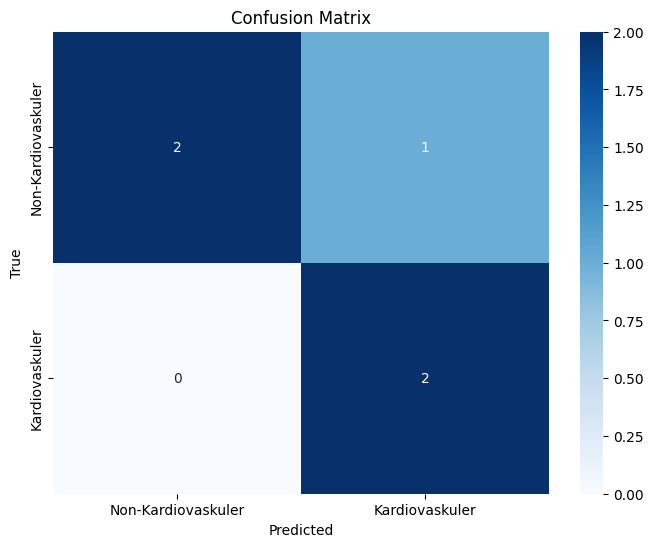

                    precision    recall  f1-score   support

Non-Kardiovaskuler       1.00      0.67      0.80         3
    Kardiovaskuler       0.67      1.00      0.80         2

          accuracy                           0.80         5
         macro avg       0.83      0.83      0.80         5
      weighted avg       0.87      0.80      0.80         5



In [36]:
# Fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Teks keluhan untuk uji
test_complaints = test_data['Clean_Keluhan'].tolist()

# Membersihkan dan tokenisasi teks keluhan uji
test_tokens = tokenizer(test_complaints, padding=True, truncation=True, return_tensors='tf')

# Membuat prediksi pada data uji
predictions = model.predict(test_tokens)
predicted_labels = tf.argmax(predictions.logits, axis=1).numpy()

# Menampilkan confusion matrix
class_names = ['Non-Kardiovaskuler', 'Kardiovaskuler']
plot_confusion_matrix(test_data['Kardiovaskuler'].values, predicted_labels, classes=class_names)

# Menampilkan classification report
print(classification_report(test_data['Kardiovaskuler'].values, predicted_labels, target_names=class_names))

# 9. Prediction

In [41]:
# Meminta pengguna memasukkan teks
new_complaint = input("Masukkan teks keluhan: ")

Masukkan teks keluhan: Siang dokter, izin bertanya. Tadi ayah saya cerita, kalo sudah beberapa kali di dadanya yg sebelah kiri muncul rasa sakit yg tiba". Rasa sakit yg beliau bilang itu kaya kalo dada kita ditusuk" pake jarum, ayah saya sata ini umurnya 56 tahun dok, kira" penyebab rasa sakit yg ayah saya alami ini apa ya dok?


In [42]:
# Membersihkan teks keluhan baru
cleaned_complaint = clean_text(new_complaint, remove_funcs)

# Tokenisasi teks keluhan baru
new_complaint_tokens = tokenizer([cleaned_complaint], padding=True, truncation=True, return_tensors='tf')

# Membuat prediksi
predictions = model.predict(new_complaint_tokens)

# Mengambil label prediksi (0 atau 1)
predicted_label = tf.argmax(predictions.logits, axis=1).numpy()[0]

# Menampilkan hasil prediksi
if predicted_label == 1:
    print("Keluhan terdeteksi sebagai penyakit kardiovaskuler.")
else:
    print("Keluhan tidak terdeteksi sebagai penyakit kardiovaskuler.")

1/1 [==============================] - 1s 653ms/step
Keluhan terdeteksi sebagai penyakit kardiovaskuler.
